In [2]:
import os
import random

import tensorflow as tf      # Deep Learning library
import numpy as np           # Handle matrices
import retro                 # Retro Environment
from retro.retro_env import RetroEnv

from skimage import transform # Help us to preprocess the frames
from skimage.color import rgb2gray # Help us to gray our frames

import matplotlib.pyplot as plt # Display graphs
%matplotlib inline
from IPython import display

from collections import deque # Ordered collection with ends

import warnings # This ignore all the warning messages that are normally printed during the training because of skiimage
warnings.filterwarnings('ignore') 

import gym

In [3]:
class SF2Env(RetroEnv):
    KEY_LIST = ["B", "A", "MODE", "START", "UP", "DOWN", "LEFT", "RIGHT", "C", "Y", "X", "Z"]
    
    def __init__(self, game, state=retro.State.DEFAULT, scenario=None, info=None, use_restricted_actions=retro.Actions.FILTERED,
                 record=False, players=1, inttype=retro.data.Integrations.STABLE, obs_type=retro.Observations.IMAGE, press_button_print=False):
        # action 입력은 DISCRETE 모드
        use_restricted_actions = retro.Actions.DISCRETE
        self.press_button_print = press_button_print
        
        RetroEnv.__init__(self, game, state, scenario, info, use_restricted_actions,
                 record, players, inttype, obs_type)
        self.buttons = ["B", "A", "MODE", "START", "UP", "DOWN", "LEFT", "RIGHT", "C", "Y", "X", "Z"]
        self.buttons_dict = {}
        for k,v in enumerate(self.buttons):
            self.buttons_dict[v] = k
        
        self.actions = [
            ['LEFT'],
            ['RIGHT'],
            ['UP'],
            ['RIGHT'],
            ['LEFT','UP'],
            ['LEFT', 'DOWN'],
            ['RIGHT', 'UP'],
            ['RIGHT', 'DOWN'],
            ['A'],
            ['B'],
            ['C'],
            ['X'],
            ['Y'],
            ['Z'],
            ['DOWN', 'A'],
            ['DOWN', 'B'],
            ['DOWN', 'C'],
            ['DOWN', 'X'],
            ['DOWN', 'Y'],
            ['DOWN', 'Z']
        ]
        
        self.action_space = gym.spaces.Discrete(len(self.actions) ** players)
    
    def step(self, a):
        ob, rew, done, info = RetroEnv.step(self, a)
        
        if self.press_button_print:
            print(self.action_array_to_keys(self.action_to_array(a)))
        
        return self.get_state_from(), rew, done, info        
    
    def reset(self):
        RetroEnv.reset(self)
        return self.get_state_from()
            
    def action_array_to_keys(self, action_array):
        press_keys = []
        for i,v in enumerate(action_array[0]):
            if v == 1:
                press_keys.append(self.KEY_LIST[i])
        return press_keys
    
    def action_to_array(self, a):
        button_array = [0] * 12
        for button in self.actions[a]:
            button_array[self.buttons_dict[button]] = 1
        return [button_array]
        
    
    # env로부터 state 값을 변환
    def get_state_from(self):
        #state = [0] * (188*71 + 2)
        state = [0] * (19*8 + 2)
        
        distance_x_between_players = int(int(self.data.lookup_value('distance_x_between_players')) / 10)
        distance_y_between_players = int(int(self.data.lookup_value('distance_y_between_players')) / 10)
        
        distance_inx = distance_x_between_players * (distance_y_between_players + 1)
        # TODO 유효하지 않은 인덱스가 없도록 처리
        if distance_inx >= len(state):
            state[0] = 1
        else:
            state[distance_inx] = 1
        
        first_player_x = int(self.data.lookup_value('first_player_x'))
        second_player_x = int(self.data.lookup_value('second_player_x'))
        
        left = 0
        right = 0
        if first_player_x > second_player_x:
            right = 1
        elif first_player_x < second_player_x: 
            left = 1
        #state[188*71] = left
        state[19*8] = left
        #state[188*71 + 1] = right
        state[19*8 + 1] = right
        
        return np.asarray(state)

    
rom_path = os.path.dirname(os.path.abspath('.')) + '/sf2-env/StreetFighterIISpecialChampionEdition-Genesis'

env = SF2Env(rom_path, 
             state='rvsb.state', 
             scenario='scenario',
             press_button_print=False)


possible_actions = np.array(list(range(1, env.action_space.n+1)))

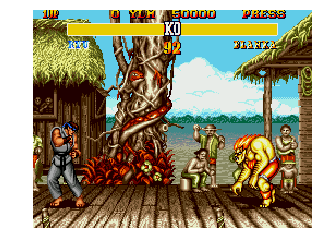

0.0

{'continuetimer': 145,
 'distance_x_between_players': 153,
 'distance_y_between_players': 0,
 'first_player_attack_x': 205,
 'first_player_health': 176,
 'first_player_matches_won': 0,
 'first_player_score': 0,
 'first_player_x': 205,
 'first_player_y': 192,
 'is_first_player_atackking': 0,
 'is_first_player_jangpoong': 0,
 'is_first_player_jangpoong_x': 0,
 'is_first_player_jangpoong_y': 0,
 'is_second_player_atackking': 0,
 'is_second_player_jangpoong': 0,
 'is_second_player_jangpoong_x': 0,
 'is_second_player_jangpoong_y': 0,
 'second_player_attack_x': 389,
 'second_player_health': 176,
 'second_player_matches_won': 0,
 'second_player_score': 0,
 'second_player_x': 389,
 'second_player_y': 192}

go?no


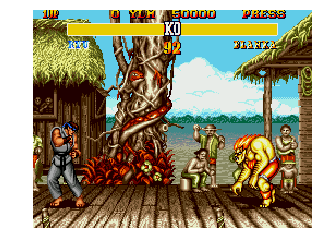

In [4]:
ob = env.reset()

possible_actions = np.array(list(range(1, env.action_space.n+1)))


plt.figure(0)
plt.clf()

ob, rew, done, info = None, None, None, None

while True:
    '''
    if i % 5 == 1:
        ob, rew, done, info = env.step(7)
    else:
        ob, rew, done, info = env.step(0)
    '''
    ob, rew, done, info = env.step(random.randint(0,19))
    plt.imshow(env.render(mode='rgb_array'))
    plt.axis('off')
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    display.display(rew)
    display.display(info)
    
    in_val = input('go?')
    if in_val == 'no':
        break

env.close()